In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

## CSV-based

In [28]:
csv_path = "speech_advtrain_acc.csv"
df_speech = pd.read_csv(csv_path)
df_speech = df_speech.loc[:, ~df_speech.columns.str.contains('__|_step')]
renames = {col: col.replace(" - test/adv/accuracy", "").replace("pgd-speech-eps", "") for col in df_speech.columns}
df_speech.rename(renames, axis=1, inplace=True)
df_speech.rename(columns={"0.0": "baseline"}, inplace=True)
df_speech.index = df_speech.index / 10
df_speech

,baseline,0.2,0.6,0.7,1.0,0.3,0.4,0.5,0.8,0.9
0.0,0.965652,0.955202,0.933030,0.935120,0.938573,0.948660,0.951022,0.945388,0.937846,0.936756
0.1,0.938846,0.969741,0.951749,0.952113,0.957474,0.964925,0.965107,0.963744,0.953839,0.955566
0.2,0.868423,0.982463,0.961654,0.959836,0.961109,0.973557,0.970286,0.969559,0.960654,0.962744
0.3,0.777374,0.958746,0.967197,0.961745,0.963289,0.979191,0.976465,0.970014,0.963289,0.963925
0.4,0.691686,0.936483,0.972194,0.961018,0.963471,0.963017,0.973921,0.971286,0.965470,0.964107
0.5,0.610722,0.919764,0.975829,0.965561,0.962835,0.937301,0.958746,0.970195,0.968560,0.962835
0.6,0.540936,0.905770,0.972194,0.966924,0.964562,0.914857,0.932394,0.960382,0.968832,0.963562
0.7,0.475784,0.886779,0.964834,0.964198,0.963744,NaN,NaN,NaN,NaN,NaN
0.8,0.421445,0.866697,0.952204,0.959019,0.963380,NaN,NaN,NaN,NaN,NaN
0.9,0.378192,0.836256,0.933485,0.946206,0.961381,NaN,NaN,NaN,NaN,NaN


In [33]:
csv_path = "esc50_advtrain_acc_new.csv"
df_esc50 = pd.read_csv(csv_path)
df_esc50 = df_esc50.loc[:, ~df_esc50.columns.str.contains('__|_step')]
renames = {col: col.replace(" - test/adv/accuracy", "").replace("pgd-esc50-eps", "") for col in df_esc50.columns}
df_esc50.rename(renames, axis=1, inplace=True)
df_esc50.rename(columns={"esc50-baseline": "baseline"}, inplace=True)
df_esc50.index = df_esc50.index / 10
df_esc50

,baseline,0.8,0.1,0.7,0.9,0.3,0.4,0.5,0.6,1.0,0.2
0.0,0.91750,0.93250,0.92500,0.91500,0.93250,0.90000,0.90500,0.86250,0.79250,0.74750,0.92750
0.1,0.81625,0.88750,0.92750,0.90125,0.83875,0.93000,0.93125,0.91375,0.90375,0.80375,0.93250
0.2,0.64750,0.87250,0.89125,0.88125,0.82750,0.90875,0.91250,0.88625,0.89375,0.79000,0.90875
0.3,0.54625,0.86500,0.74500,0.87000,0.82750,0.89500,0.89875,0.88500,0.89000,0.79500,0.90000
0.4,0.46625,0.85875,0.63375,0.87750,0.80250,0.88875,0.90000,0.87750,0.88625,0.79625,0.84750
0.5,0.39250,0.83625,0.52000,0.87875,0.79625,0.87000,0.89125,0.87250,0.88500,0.79125,0.76875
0.6,0.33750,0.82250,0.46000,0.87625,0.79625,0.80000,0.82750,0.87750,0.88125,0.79125,0.70125
0.7,0.31250,0.82625,0.39625,0.86500,0.79500,0.75500,0.73250,0.83375,0.86125,0.78625,0.64875
0.8,0.26250,0.82375,0.34000,0.86250,0.80375,0.69000,0.63000,0.77375,0.84500,0.78625,0.58125
0.9,0.22500,0.82625,0.31000,0.81625,0.80500,0.62125,0.58000,0.70500,0.79375,0.78250,0.49625


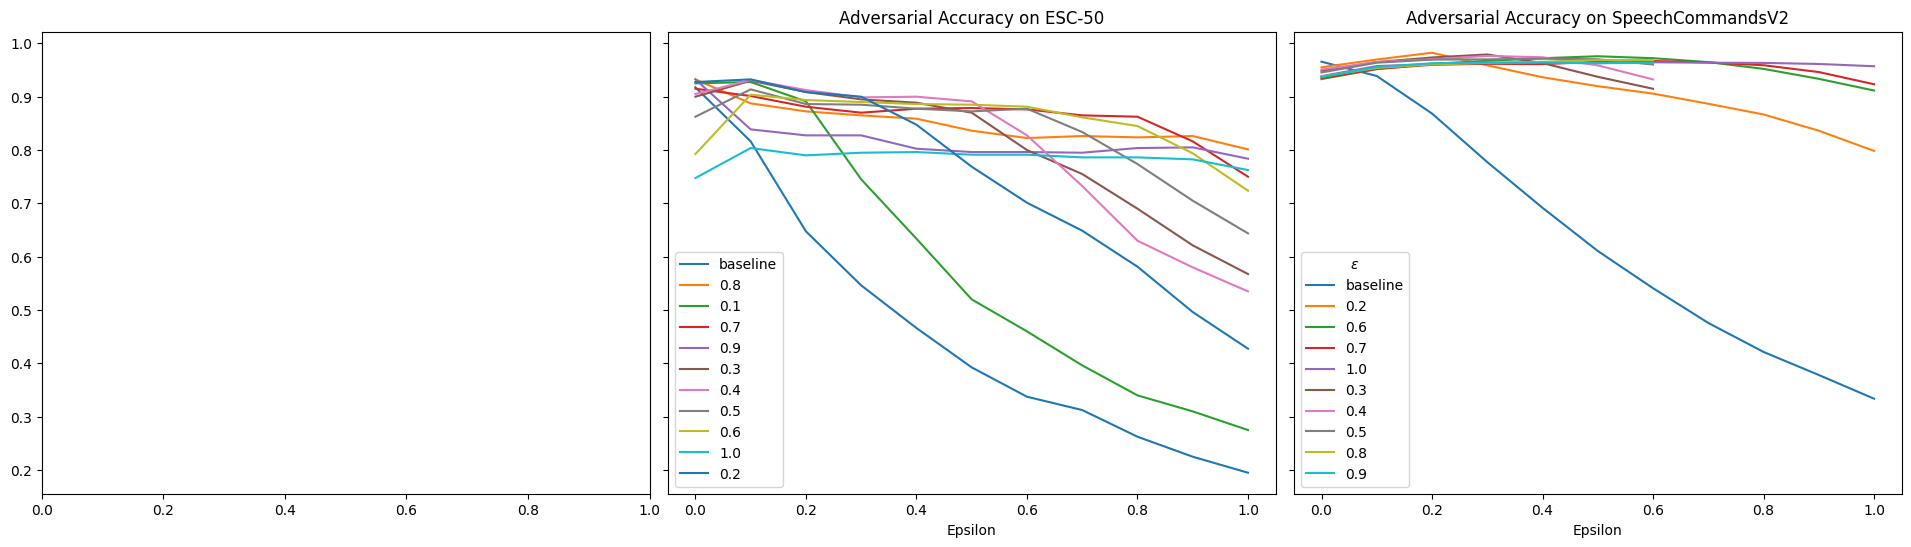

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), sharey=True)
df_esc50.plot(ax=ax[1])
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epsilon")
ax[1].set_title("Adversarial Accuracy on ESC-50")

df_speech.plot(ax=ax[2])
ax[2].set_ylabel("Accuracy")
ax[2].set_xlabel("Epsilon")
ax[2].set_title("Adversarial Accuracy on SpeechCommandsV2")

plt.subplots_adjust(wspace=0.03)
plt.legend(title=r"$\epsilon$")
plt.savefig("advtrain_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), sharey=True)
api = wandb.Api()
runs = api.runs("dettmer-rwth-aachen-university/openmic_advtrain")
# ESC-50
runs_esc50 = [run for run in runs if set(["esc50", "final", "advtrain"]).issubset(set(run.tags))]
ys_esc50 = np.array([get_acc(run) for run in runs_esc50])
ax[1].plot(xs, mean_ys_esc50, label="Mean", color='tab:blue')
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epsilon")
ax[1].set_title("Adversarial Accuracy on ESC-50")

# SpeechCommandsV2
runs_speech = [run for run in runs if set(["nsynth", "final", "advtrain"]).issubset(set(run.tags))]
ys_speech = np.array([get_acc(run) for run in runs_speech])
ax[2].plot(xs, mean_ys_speech, label="Mean", color='tab:green')
ax[2].set_ylabel("Accuracy")
ax[2].set_xlabel("Epsilon")
ax[2].set_title("Adversarial Accuracy on SpeechCommandsV2")

plt.subplots_adjust(wspace=0.03)
plt.legend(title=r"$\epsilon$")
plt.savefig("advtrain_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

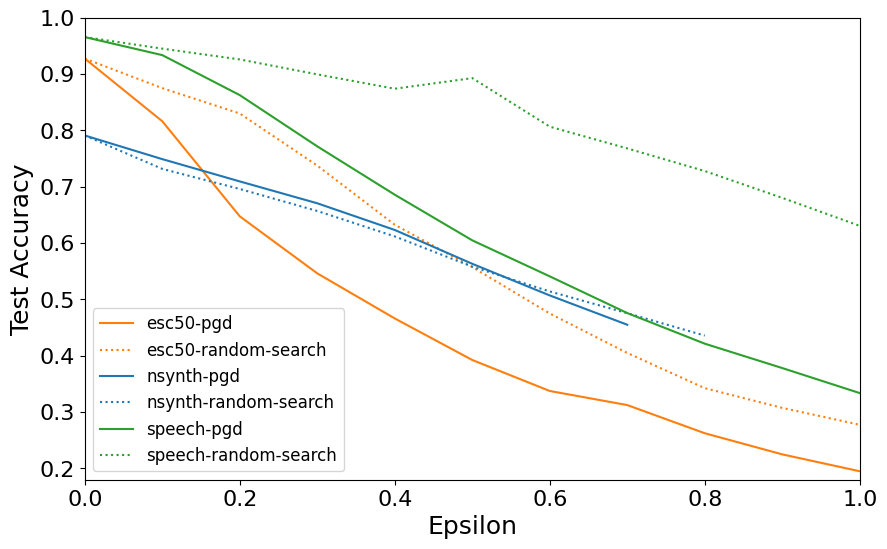

In [24]:
csv_path = "baseline_attacks.csv"
df = pd.read_csv(csv_path)
grouped = df.groupby(' "name"')

# Get unique prefixes before the '-' for color mapping
prefixes = [n.split('-')[0].strip('" ') for n in df[' "name"'].unique()]
unique_prefixes = list(dict.fromkeys(prefixes))  # preserve order

# Assign colors to each prefix
colors = plt.cm.tab10.colors
prefix_color_map = {prefix: colors[i % len(colors)] for i, prefix in enumerate(unique_prefixes)}

plt.figure(figsize=(10, 6))
for name, group in grouped:
    prefix = name.split('-')[0].strip('" ')
    color = prefix_color_map[prefix]
    linestyle = ':' if "random-search" in name else '-'
    group.plot(
        x='epsilon',
        y='test/accuracy',
        ax=plt.gca(),
        label=name.strip('" '),
        color=color,
        linestyle=linestyle
    )

plt.xlabel("Epsilon", fontsize=18)
plt.ylabel("Test Accuracy", fontsize=18)
plt.ylim(0.18, 1)
plt.xlim(0, 1)
plt.legend(fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("baseline_attacks.pdf", format="pdf", bbox_inches="tight")
plt.show()

## API-based

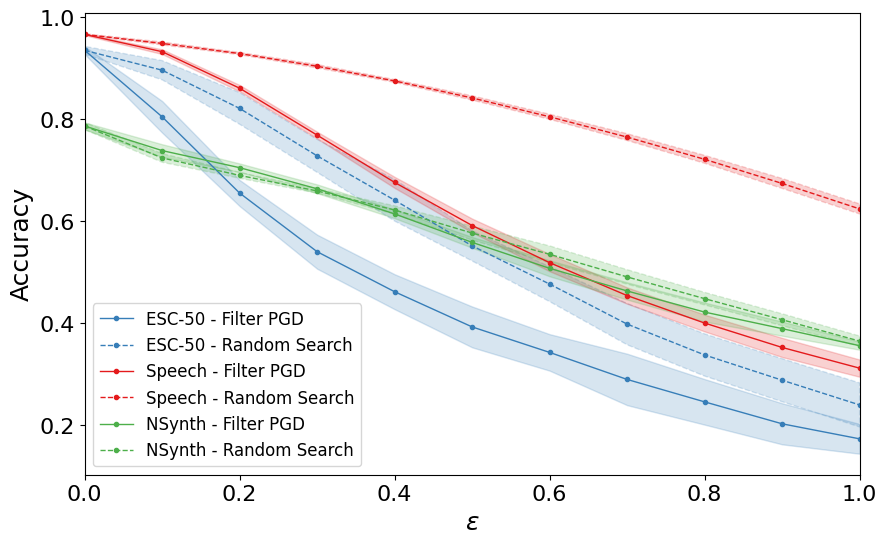

In [48]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', '#000000']
style_lookup = {
    "esc50": {
        "test/adv/accuracy": {'color': CB_color_cycle[0], 'linestyle': '-'},
        "test/rs/accuracy": {'color': CB_color_cycle[0], 'linestyle': '--'}
        },
    "SpeechCommandsV2": {
        "test/adv/accuracy": {'color': CB_color_cycle[7], 'linestyle': '-'},
        "test/rs/accuracy": {'color': CB_color_cycle[7], 'linestyle': '--'}
        },
    "nsynth": {
        "test/adv/accuracy": {'color': CB_color_cycle[2], 'linestyle': '-'},
        "test/rs/accuracy": {'color': CB_color_cycle[2], 'linestyle': '--'}
        },
}

label_lookup = {
    "esc50": "ESC-50",
    "SpeechCommandsV2": "Speech",
    "nsynth": "NSynth",
    "test/adv/accuracy": "Filter PGD",
    "test/rs/accuracy": "Random Search"
}

def get_acc(run, acc_key: str = "test/adv/accuracy"):
    history_adv = run.scan_history(keys = ["trainer/global_step", acc_key])
    adv_acc = [(row["trainer/global_step"], row[acc_key]) for row in history_adv][:10]
    # dumb hotfix
    if run.id == '60233468':
        adv_acc[0] = (0.1, adv_acc[0][1])
    history_clean = run.scan_history(keys = ["test/clean/accuracy"])
    clean_acc = [row["test/clean/accuracy"] for row in history_clean][0]
    #keys = history.keys()
    #adv_acc = history[["epoch", "_timestamp", "_runtime", "_step", "test/adv/accuracy"]].dropna()[:10]
    #adv_acc = history[["trainer/global_step", "test/adv/accuracy"]].dropna()
    adv_acc = sorted(adv_acc, key=lambda x: x[0])
    adv_acc = np.array([tup[1] for tup in adv_acc])
    if len(adv_acc) < 10:
        return
    clean_acc = np.array(clean_acc)
    acc = np.hstack([clean_acc, adv_acc])
    return acc

def plot_runs(runs, ax, dataset: str, acc_key: str, acc_cached = None):
    final_runs = [
        run for run in runs if set([dataset, "final", "baseline"]).issubset(set(run.tags))
    ]
    xs = np.arange(0, 1.1, 0.1) #TODO: 
    if acc_cached is not None:
        ys = acc_cached
    else:
        ys = [get_acc(run, acc_key) for run in final_runs]
        ys = np.array([y for y in ys if y is not None])
    mean_ys = ys.mean(axis=0)
    n = ys.shape[0]
    confidence = 0.95
    h = sem(ys, axis=0) * t.ppf((1 + confidence) / 2., n-1)

    ax.plot(xs, mean_ys, label=label_lookup[dataset] + " - " + label_lookup[acc_key], 
            linestyle=style_lookup[dataset][acc_key]['linestyle'], 
            linewidth=1, marker='.',
            color=style_lookup[dataset][acc_key]['color'])
    
    """ax.plot(xs, mean_ys, label=label_lookup[dataset] + " - " + label_lookup[acc_key],
            marker='.',
            color=style_lookup[dataset][acc_key]['color'])"""
    ax.fill_between(xs, mean_ys - h, mean_ys + h, color=style_lookup[dataset][acc_key]['color'], alpha=0.2,
                    linestyle=style_lookup[dataset][acc_key]['linestyle'])
    return ys

api = wandb.Api()
runs = api.runs("dettmer-rwth-aachen-university/openmic_advtrain")

fig, ax = plt.subplots(figsize=(10, 6))
if 'ys' not in locals():
    ys = [None] * 6
ys = [plot_runs(runs, ax, "esc50", "test/adv/accuracy", acc_cached=ys[0]),
      plot_runs(runs, ax, "esc50", "test/rs/accuracy", acc_cached=ys[1]),
      plot_runs(runs, ax, "SpeechCommandsV2", "test/adv/accuracy", acc_cached=ys[2]),
      plot_runs(runs, ax, "SpeechCommandsV2", "test/rs/accuracy", acc_cached=ys[3]),
      plot_runs(runs, ax, "nsynth", "test/adv/accuracy", acc_cached=ys[4]),
      plot_runs(runs, ax, "nsynth", "test/rs/accuracy", acc_cached=ys[5])]
ax.set_xlim(0, 1)
ax.set_xlabel(r"$\epsilon$", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
#ax.set_title("Mean Accuracy with 95% CI vs Epsilon")
ticks = np.arange(0, 1.1, 0.2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend()
ax.legend(fontsize=12)
plt.savefig("baselines.pdf", format="pdf", bbox_inches="tight")
plt.show()

loading nsynth:   0%|          | 0/11 [39:50<?, ?it/s]


AttributeError: Line2D.set() got an unexpected keyword argument 's'

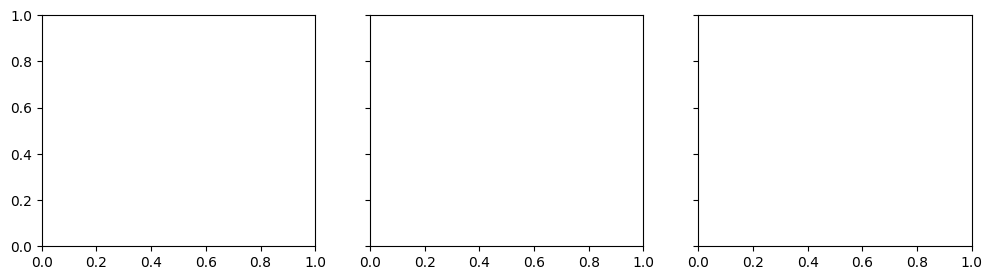

In [ ]:
from tqdm import tqdm
def get_adv_acc(run, acc_key: str = "test/adv/accuracy"):
    history_adv = run.scan_history(keys = ["trainer/global_step", acc_key])
    adv_acc = [(row["trainer/global_step"], row[acc_key]) for row in history_adv][-10:]
    # dumb hotfix
    if run.id == '60233468':
        adv_acc[0] = (0.1, adv_acc[0][1])
    history_clean = run.scan_history(keys = ["test/clean/accuracy"])
    clean_acc = [row["test/clean/accuracy"] for row in history_clean][0]
    adv_acc = sorted(adv_acc, key=lambda x: x[0])
    adv_acc = np.array([tup[1] for tup in adv_acc])
    if len(adv_acc) < 10:
        return
    clean_acc = np.array(clean_acc)
    acc = np.hstack([clean_acc, adv_acc])
    return acc

def plot_adv_runs(runs, ax, dataset: str, acc_key: str, acc_cached = None):
    final_runs = [
        run for run in runs if set([dataset, "final", "advtrain"]).issubset(set(run.tags))
    ]
    final_runs = sorted(final_runs, key=lambda r: float(r.name.split('-')[-1][3:]))
    xs = np.arange(0, 1.1, 0.1) 
    if acc_cached is not None:
        ys = acc_cached
    else:
        ys = [get_adv_acc(run, acc_key) for run in tqdm(final_runs, f"loading {dataset}")]
        ys = np.array([y for y in ys if y is not None])

    for i, y in enumerate(ys):
        eps = final_runs[i].name.split('-')[-1][3:]
        ax.plot(xs, y,
                linestyle=style_lookup[dataset][acc_key]['linestyle'], 
                linewidth=1, marker='.',
                color=CB_color_cycle[int(float(eps)*10 - 1)],
                label=eps)
    return ys

api = wandb.Api()
runs = api.runs("dettmer-rwth-aachen-university/openmic_advtrain")

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), sharey=True)

if 'ys_adv' not in locals():
    ys_adv = [None] * 3
ys_adv = [plot_adv_runs(runs, ax[0], "esc50", "test/adv/accuracy", acc_cached=ys_adv[0]),
      plot_adv_runs(runs, ax[1], "SpeechCommandsV2", "test/adv/accuracy", acc_cached=ys_adv[1]),]
      #plot_adv_runs(runs, ax[2], "nsynth", "test/adv/accuracy", acc_cached=ys_adv[2])]

ticks = np.arange(0, 1.1, 0.2)
ax[0].set_ylabel("Accuracy", fontsize=14)
ax[0].set_title("ESC-50")
ax[1].set_title("SpeechCommands")
ax[2].set_title("NSynth")
ax[0].legend(fontsize=8, title=r"$\epsilon$", ncol=2)
for axis in ax:
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_xlabel("Epsilon", fontsize=14)
    axis.set_xticks(ticks)
    axis.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("advtrain.pdf", format="pdf", bbox_inches="tight")
plt.show()